# 10/22/2015

# Beginning Analysis of Red Disk Fraction over Redshift, starting by using Tom's selection Method


# Section 1: Cross-matching with ULTRAVISTA catalog
## ULTRAVISTA provides k-corrected colors and magnitudes for 339,384 galaxies in the COSMOS field. GZ:Hubble classified 84,350 galaxies in the COSMOS field. Of these, 70,198 were sky-matched in the ULTRAVista catalog (with a max. separation of 1"). 

## link to ULTRAVista data: http://terapix.iap.fr/article.php?id_article=844

## A note: in Tom's work, he claims that 26,452 of these are within a redshift range 0.2 <= z <= 1.0, however I find 51,370 in this range (see below). I'm not sure which z measurement he's going with though - I'm using the 'Z' parameter as described in Griffith's et al. (spec z unless bad, then photoz). 

In [148]:
%pylab inline
import matplotlib.gridspec as gridspec

from astropy.io import fits as pyfits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
mpl.rcParams['text.usetex']=True


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
data = pyfits.open('/home/mel/Documents/GZ_HUBBLE/other_catalogs/ULTRAVISTA/matched_catalog.fits')
data=data[1].data

In [3]:
data_2_1 = (data['Z']>=0.2) & (data['Z']<=1.0) 
print 'The number of galaxies in COSMOS between $0.2 < z < 1.0$ is %s'%len(data[data_2_1])


The number of galaxies in COSMOS between $0.2 < z < 1.0$ is 51370


# Section 2: Removing Dusty Galaxies
# Galaxies so far (UV + GZH + 0.2 < z < 1.0): 51,370
## a note: the NUV-MR column in the UV table is a lie...somehow? physically subtracting the MR from NUV column gives the correct values. 

In [4]:
def mel_cmap(cmap,N_colors):
    #returns list of colors for scatter 
    c_list=np.linspace(0,1,N_colors)
    mymap = plt.get_cmap(cmap)
    my_colors = mymap(c_list)
    return my_colors 
    

In [5]:
data_2_4 = (data['Z']>=0.2) & (data['Z']<=.4)# & (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)
data_4_6 = (data['Z']>0.4) & (data['Z']<=.6) #& (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)
data_6_8 = (data['Z']>0.6) & (data['Z']<=.8) #& (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)
data_8_1 = (data['Z']>0.8) & (data['Z']<=1) #& (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)


In [6]:
data_2_4_red = (data['Z']>=0.2) & (data['Z']<=.4) & (data['MNUV']-data['MR']>4) & (data['MNUV']-data['MR']<(1.6+2.2*(data['MR']-data['MJ'])))
data_4_6_red = (data['Z']>0.4) & (data['Z']<=.6) & (data['MNUV']-data['MR']>4) & (data['MNUV']-data['MR']<1.6+2.2*(data['MR']-data['MJ']))
data_6_8_red = (data['Z']>0.6) & (data['Z']<=.8) & (data['MNUV']-data['MR']>4) & (data['MNUV']-data['MR']<1.6+2.2*(data['MR']-data['MJ']))
data_8_1_red = (data['Z']>0.8) & (data['Z']<=1) & (data['MNUV']-data['MR']>4) & (data['MNUV']-data['MR']<1.6+2.2*(data['MR']-data['MJ']))

The number of galaxies after removing dusty galaxies is 50462


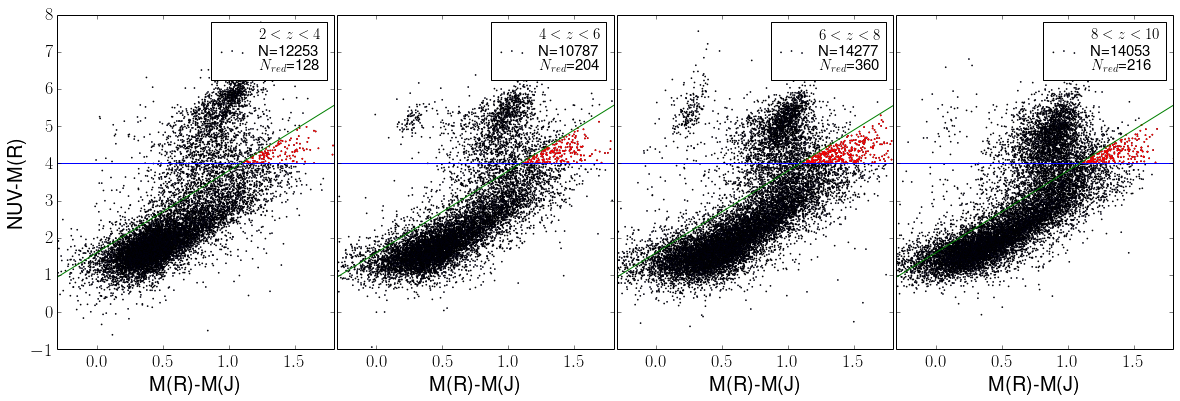

In [7]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18 

f=plt.figure(figsize=(20,6))
gs=gridspec.GridSpec(1,4)
gs.update(wspace=.01)

data_list=[data_2_4,data_4_6,data_6_8,data_8_1]
data_list_red=[data_2_4_red,data_4_6_red,data_6_8_red,data_8_1_red]

labellist=[2,4,6,8]

x=np.linspace(-1,2,10)
for i in range(0,4):
    ax=plt.subplot(gs[0,i])
    plt.scatter(data[data_list[i]]['MR']-data[data_list[i]]['MJ'],data[data_list[i]]['MNUV']-data[data_list[i]]['MR'],s=.5,label='$%s<z<%s$\nN=%s\n$N_{red}$=%s'%(labellist[i],labellist[i]+2,len(data[data_list[i]]),len(data[data_list_red[i]])))
    plt.scatter(data[data_list_red[i]]['MR']-data[data_list_red[i]]['MJ'],data[data_list_red[i]]['MNUV']-data[data_list_red[i]]['MR'],s=.5,color='r')

    if i!=0:
        plt.tick_params(labelleft='off')
    plt.xlim(-.3,1.8)
    plt.ylim(-1,8)
    plt.xlabel('M(R)-M(J)',fontsize=20)
    if i==0:
        plt.ylabel('NUV-M(R)',fontsize=20)
    plt.legend(numpoints=1,fontsize=15)
    plt.plot(x,4+0*x)
    plt.plot(x,1.6+2.2*x)

data_2_1_red = (data['Z']>=0.2) & (data['Z']<=1) & (data['MNUV']-data['MR']>4) & (data['MNUV']-data['MR']<(1.6+2.2*(data['MR']-data['MJ'])))

N_left = len(data[data_2_1])-len(data[data_2_1_red])

print 'The number of galaxies after removing dusty galaxies is %s' %N_left

# Section 3 - Luminosity Cut 
## I'm not sure exactly what the best route is here; Tom used an absolute magnitude cut (variable with redshift), while Claudia suggests a surface brightness cut. For now, I'm just going to go with a mostly-arbitrary SB cut of mu < 23 (dashed line below). For now... 

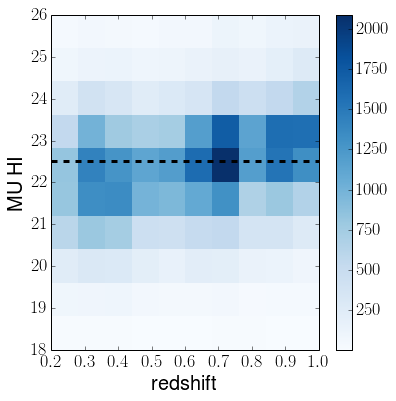

In [192]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18 

f=plt.figure(figsize=(6,6))
gs=gridspec.GridSpec(1,1)

ax=plt.subplot(gs[0,0])
hist,xedges,yedges=np.histogram2d(data[data_2_1]['Z'],data[data_2_1]['MU_HI'],range=((.2,1),(18,26)))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.imshow(hist.T,origin='lower',interpolation='nearest',extent=extent,aspect='auto',cmap=cm.Blues)
plt.colorbar()
plt.axhline(y=22.5,ls='dashed',color='k',lw=3)
plt.xlabel('redshift',fontsize=20)
plt.ylabel('MU~HI',fontsize=20)


In [198]:
SB_cut = 22
new_sample = (data['Z']>=0.2) & (data['Z']<=1) & ((data['MNUV']-data['MR']<4) | (data['MNUV']-data['MR']>(1.6+2.2*(data['MR']-data['MJ'])))) & (data['MU_HI']<SB_cut)
print 'Galaxies remaining after applying surface brightness cut: %s'%len(data[new_sample])

Galaxies remaining after applying surface brightness cut: 18110


# Section 4: Selecting Red Sequence 
## After removing dusty galaxies and applying a surface brightness cut, we have a sample of 34,769 galaxies. Now we need to separate them into blue cloud, red sequence, and intermediate / green valley. 

In [199]:
new_2_4 = (data['Z']>=0.2) & (data['Z']<=.4) & ((data['MNUV']-data['MR']<4) | (data['MNUV']-data['MR']>(1.6+2.2*(data['MR']-data['MJ'])))) & (data['MU_HI']<SB_cut)
new_4_6 = (data['Z']>0.4) & (data['Z']<=.6) & ((data['MNUV']-data['MR']<4) | (data['MNUV']-data['MR']>(1.6+2.2*(data['MR']-data['MJ'])))) & (data['MU_HI']<SB_cut)
new_6_8 = (data['Z']>0.6) & (data['Z']<=.8) & ((data['MNUV']-data['MR']<4) | (data['MNUV']-data['MR']>(1.6+2.2*(data['MR']-data['MJ'])))) & (data['MU_HI']<SB_cut)
new_8_1 = (data['Z']>0.8) & (data['Z']<=1) & ((data['MNUV']-data['MR']<4) | (data['MNUV']-data['MR']>(1.6+2.2*(data['MR']-data['MJ'])))) & (data['MU_HI']<SB_cut)


In [220]:
def Hist3D(xedges,yedges,the_data,colorhist):
    newmatrix = np.zeros(shape=(len(yedges)-1,len(xedges)-1))
    for i in range(0,len(yedges)-1):
        for j in range(0,len(xedges)-1):
            data_i_j = (the_data['MNUV']-the_data['MR']>=yedges[i]) & (the_data['MNUV']-the_data['MR'] < yedges[i+1]) & (the_data['MR']>=xedges[j]) & (the_data['MR']<xedges[j+1])
            newmatrix[i,j]=np.average(the_data[data_i_j]['t01_smooth_or_features_a02_features_or_disk_best_fraction'])
    newmatrix=ma.masked_where(colorhist.T<50,newmatrix)
    return newmatrix

In [221]:
colorhist0,xedges,yedges = np.histogram2d(data[data_list[0]]['MR'],data[data_list[0]]['MNUV']-data[data_list[0]]['MR'],range=((-30,-15),(-1,8)),bins=(20,20))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
this_hist0=Hist3D(xedges,yedges,data[data_list[0]],colorhist0)

colorhist1,xedges,yedges = np.histogram2d(data[data_list[1]]['MR'],data[data_list[1]]['MNUV']-data[data_list[1]]['MR'],range=((-30,-15),(-1,8)),bins=(20,20))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
this_hist1=Hist3D(xedges,yedges,data[data_list[1]],colorhist1)

colorhist2,xedges,yedges = np.histogram2d(data[data_list[2]]['MR'],data[data_list[2]]['MNUV']-data[data_list[2]]['MR'],range=((-30,-15),(-1,8)),bins=(20,20))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
this_hist2=Hist3D(xedges,yedges,data[data_list[2]],colorhist2)

colorhist3,xedges,yedges = np.histogram2d(data[data_list[3]]['MR'],data[data_list[3]]['MNUV']-data[data_list[3]]['MR'],range=((-30,-15),(-1,8)),bins=(20,20))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
this_hist3=Hist3D(xedges,yedges,data[data_list[3]],colorhist3)

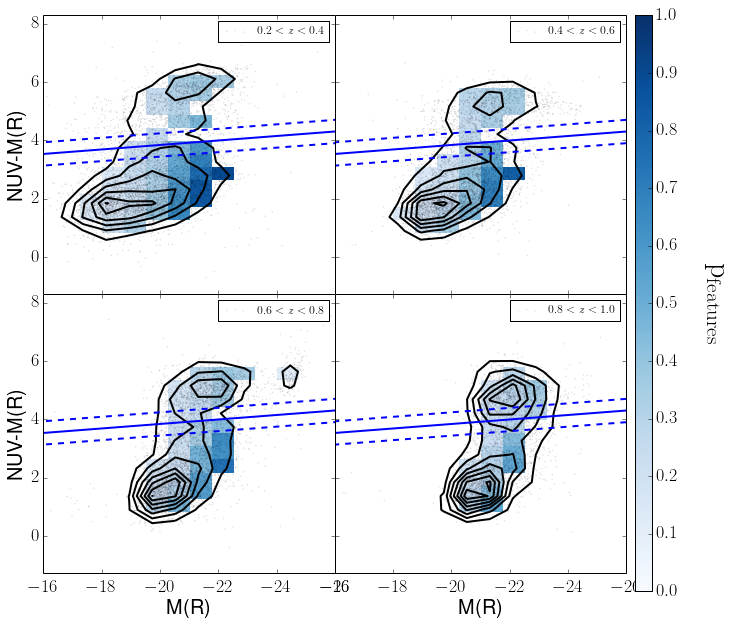

In [228]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18 

f=plt.figure(figsize=(12,10))
gs=gridspec.GridSpec(2,2)
gs.update(wspace=0,hspace=0)

data_list=[new_2_4,new_4_6,new_6_8,new_8_1]
gsx=[0,0,1,1]
gsy=[0,1,0,1]
labellist=[2,4,6,8]

x=np.linspace(-40,-10,10)
ax0=plt.subplot(gs[0,0])
plt.scatter(data[data_list[0]]['MR'],data[data_list[0]]['MNUV']-data[data_list[0]]['MR'],s=.1,alpha=.2,label='$0.2<z<0.4$')
plt.contour(colorhist0.T,extent=extent,colors='k',linewidths=2)
im0=ax0.imshow(this_hist0,origin='lower',extent=extent,interpolation='nearest',cmap=cm.Blues,vmin=0,vmax=1)
plt.plot(x,2.3-.077*x,lw=2)    
plt.plot(x,1.9-.077*x,lw=2,ls='dashed',c='b')    
plt.plot(x,2.7-.077*x,lw=2,ls='dashed',c='b')    
plt.ylim(-1,8)
plt.xlim(-26,-16)
plt.tick_params(labelbottom='off')
plt.ylabel('NUV-M(R)',fontsize=20)
plt.legend()
plt.gca().invert_xaxis()

ax1=plt.subplot(gs[0,1])
plt.scatter(data[data_list[1]]['MR'],data[data_list[1]]['MNUV']-data[data_list[1]]['MR'],s=.1,alpha=.2,label='$0.4<z<0.6$')
plt.contour(colorhist1.T,extent=extent,colors='k',linewidths=2)
im1=ax1.imshow(this_hist1,origin='lower',extent=extent,interpolation='nearest',cmap=cm.Blues,vmin=0,vmax=1)
plt.tick_params(labelleft='off',labelbottom='off')
plt.plot(x,2.3-.077*x,lw=2)    
plt.plot(x,1.9-.077*x,lw=2,ls='dashed',c='b')    
plt.plot(x,2.7-.077*x,lw=2,ls='dashed',c='b')    
plt.ylim(-1,8)
plt.xlim(-26,-16)
plt.gca().invert_xaxis()
plt.legend()

ax2=plt.subplot(gs[1,0],sharex=ax0)
plt.scatter(data[data_list[2]]['MR'],data[data_list[2]]['MNUV']-data[data_list[2]]['MR'],s=.1,alpha=.2,label='$0.6<z<0.8$')
plt.contour(colorhist2.T,extent=extent,colors='k',linewidths=2)
im2=ax2.imshow(this_hist2,origin='lower',extent=extent,interpolation='nearest',cmap=cm.Blues,vmin=0,vmax=1)
plt.plot(x,2.3-.077*x,lw=2)    
plt.plot(x,1.9-.077*x,lw=2,ls='dashed',c='b')    
plt.plot(x,2.7-.077*x,lw=2,ls='dashed',c='b')    
plt.ylim(-1,8)
plt.xlim(-26,-16)
plt.gca().invert_xaxis()
plt.ylabel('NUV-M(R)',fontsize=20)
plt.xlabel('M(R)',fontsize=20)
plt.legend()

ax3=plt.subplot(gs[1,1],sharex=ax1)
plt.scatter(data[data_list[3]]['MR'],data[data_list[3]]['MNUV']-data[data_list[3]]['MR'],s=.1,alpha=.2,label='$0.8<z<1.0$')
plt.contour(colorhist3.T,extent=extent,colors='k',linewidths=2)
im3=ax3.imshow(this_hist3,origin='lower',extent=extent,interpolation='nearest',cmap=cm.Blues,vmin=0,vmax=1)
plt.tick_params(labelleft='off')

        
plt.plot(x,2.3-.077*x,lw=2)    
plt.plot(x,1.9-.077*x,lw=2,ls='dashed',c='b')    
plt.plot(x,2.7-.077*x,lw=2,ls='dashed',c='b')    
plt.ylim(-1,8)
plt.xlim(-26,-16)
plt.gca().invert_xaxis()
plt.legend()
plt.xlabel('M(R)',fontsize=20)


f.subplots_adjust(wspace=0, hspace=0,right=.8)
cbar_ax = f.add_axes([0.81, 0.1, 0.02, 0.8])
f.colorbar(im, cax=cbar_ax)
f.text(0.9, 0.5, r'$\mathrm{p_{features}}$', ha='center', va='center', rotation=270,fontsize=30)

In [230]:
red_sequence = (data['Z']>=0.2) & (data['Z']<=1) & ((data['MNUV']-data['MR']<4) | (data['MNUV']-data['MR']>(1.6+2.2*(data['MR']-data['MJ'])))) & (data['MU_HI']<SB_cut) & (data['MNUV']-data['MR']>(2.7-.077*data['MR'])) 
blue_cloud = (data['Z']>=0.2) & (data['Z']<=1) & ((data['MNUV']-data['MR']<4) | (data['MNUV']-data['MR']>(1.6+2.2*(data['MR']-data['MJ'])))) & (data['MU_HI']<SB_cut) & (data['MNUV']-data['MR']<(1.9-.077*data['MR'])) 


In [232]:
Red_Sequence=data[red_sequence]

In [249]:
rs_2_4_disks = (Red_Sequence['Z']>0.2) & (Red_Sequence['Z']<=0.4) & (Red_Sequence['t01_smooth_or_features_a02_features_or_disk_best_fraction']>.8)
rs_4_6_disks = (Red_Sequence['Z']>0.4) & (Red_Sequence['Z']<=0.6) & (Red_Sequence['t01_smooth_or_features_a02_features_or_disk_best_fraction']>.8)
rs_6_8_disks = (Red_Sequence['Z']>0.6) & (Red_Sequence['Z']<=0.8) & (Red_Sequence['t01_smooth_or_features_a02_features_or_disk_best_fraction']>.8)
rs_8_1_disks = (Red_Sequence['Z']>0.8) & (Red_Sequence['Z']<=1) & (Red_Sequence['t01_smooth_or_features_a02_features_or_disk_best_fraction']>.8)

In [239]:
whole_sample=data[new_sample]

In [250]:
all_2_4_disks = (whole_sample['Z']>0.2) & (whole_sample['Z']<=0.4) & (whole_sample['t01_smooth_or_features_a02_features_or_disk_best_fraction']>.8)
all_4_6_disks = (whole_sample['Z']>0.4) & (whole_sample['Z']<=0.6) & (whole_sample['t01_smooth_or_features_a02_features_or_disk_best_fraction']>.8)
all_6_8_disks = (whole_sample['Z']>0.6) & (whole_sample['Z']<=0.8) & (whole_sample['t01_smooth_or_features_a02_features_or_disk_best_fraction']>.8)
all_8_1_disks = (whole_sample['Z']>0.8) & (whole_sample['Z']<=1) & (whole_sample['t01_smooth_or_features_a02_features_or_disk_best_fraction']>.8)

In [242]:
len(data[rs_2_4_disks])

34

In [251]:
red_list = [.3,.5,.7,.9]

In [252]:
frac_list = [float(len(data[rs_2_4_disks]))/len(data[all_2_4_disks]),float(len(data[rs_4_6_disks]))/len(data[all_4_6_disks]),float(len(data[rs_6_8_disks]))/len(data[all_6_8_disks]),float(len(data[rs_8_1_disks]))/len(data[all_8_1_disks]),]

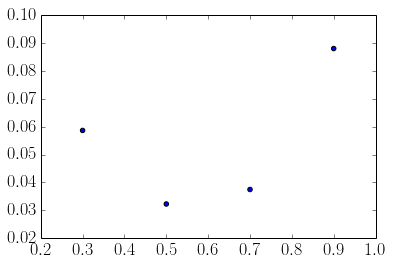

In [253]:
plt.scatter(red_list,frac_list)


In [155]:
import numpy.ma as ma

(array([  137.,   207.,   309.,   414.,   568.,   702.,   919.,  1211.,
         1482.,  1662.]),
 array([ 20.00650215,  20.30583172,  20.60516129,  20.90449085,
         21.20382042,  21.50314999,  21.80247955,  22.10180912,
         22.40113869,  22.70046825,  22.99979782]),
 <a list of 10 Patch objects>)

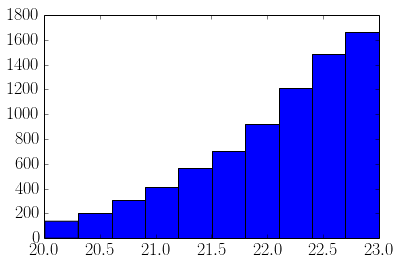

In [97]:
plt.hist(new_data[new_new_data]['MU_HI'])